In [1]:
# -*- coding: utf-8 -*-

# 3. Polynomial Regression(다항 회귀)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('./data/PolynomialRegressionData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## 3-1. 단순 선형 회귀 (Simple Linear Regression)

In [4]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y) # 전체 데이터로 학습

LinearRegression()

### 데이터 시각화 (전체)

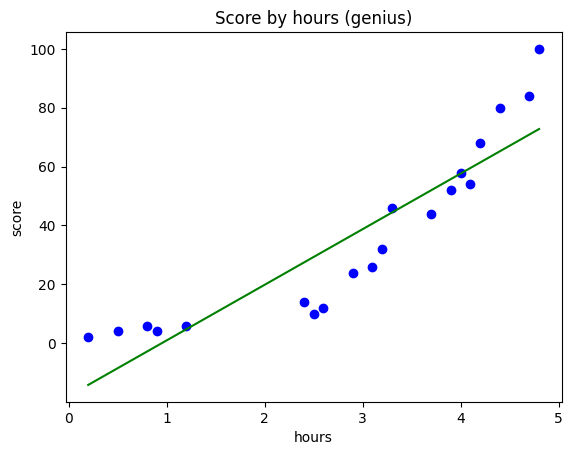

In [5]:
plt.scatter(X, y, color='blue') # 산점도
plt.plot(X, reg.predict(X), color='green') # 선 그래프
plt.title('Score by hours (genius)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

In [6]:
reg.score(X, y) # 전체 데이터를 통한 모델 평가 81.7점

0.8169296513411765

## 3-2. 다항 회귀 (Polynomial Regression)

In [9]:
from sklearn.preprocessing import PolynomialFeatures # 현재 데이터를 다항식 형태로 변경하는 함수
poly_reg = PolynomialFeatures(degree=2) # 2차 다항식으로(다항회귀)
X_poly = poly_reg.fit_transform(X)  # poly_rag.fit(), poli_reg.transform() 이렇게 따로 호출할수 도 있음. 핏은 새롭게 만들 피쳐들의 조합을 찾는 역할, 트랜스폼은 실제로 데이터를 변환하는 작업
X_poly[:5] # [x] -> [x^0, x^1, x^2] -> x 가 3이라면 [1, 3, 9] 으로 변환

array([[1.  , 0.2 , 0.04],
       [1.  , 0.5 , 0.25],
       [1.  , 0.8 , 0.64],
       [1.  , 0.9 , 0.81],
       [1.  , 1.2 , 1.44]])

In [8]:
X[:5] # 원본 데이터

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [10]:
poly_reg.get_feature_names_out() # [x^0, x^1, x^2]

array(['1', 'x0', 'x0^2'], dtype=object)

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y) # 변환된 X 와 y 를 가지고 모델 생성 (학습)

LinearRegression()

### 데이터 시각화 (변환된 X 와 y)

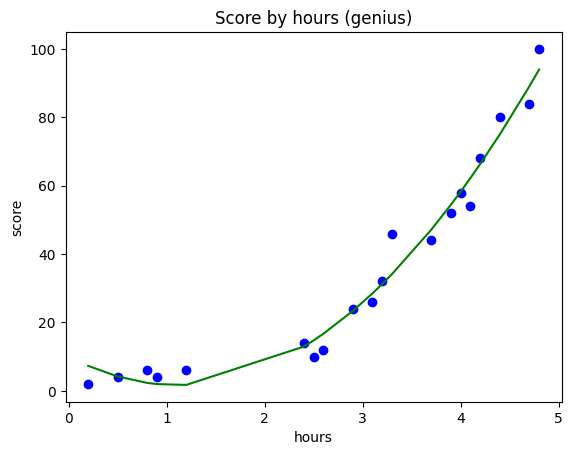

In [12]:
plt.scatter(X, y, color='blue')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color='green') # predict : 예측하는 함수, fit : 학습시키는 함수
plt.title('Score by hours (genius)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

In [13]:
# 위에 그래프를 좀더 부드럽게 하기위해 넘파이를 이용해 데이터 생성
X_range = np.arange(np.min(X), np.max(X), 0.1) # X 의 최소값에서 최대값까지의 범위를 0.1 단위로 잘라서 데이터를 생성. NumPy 1.25 버전에서부터는 np.min(X) np.가 추가됨
X_range

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [14]:
X_range.shape # X_range 컬럼 개수 46 1차원 배열

(46,)

In [15]:
X[:5] # 원래 데이터 5개 의 2차원 배열임.

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [16]:
X.shape # 원래 데이터 컬럼 개수 20이고 2차원 배열

(20, 1)

In [17]:
X_range = X_range.reshape(-1, 1) # -1은 row 개수는 자동으로 계산, column 개수는 1개인 2차원 배열로
X_range.shape

(46, 1)

In [23]:
X_range

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6],
       [0.7],
       [0.8],
       [0.9],
       [1. ],
       [1.1],
       [1.2],
       [1.3],
       [1.4],
       [1.5],
       [1.6],
       [1.7],
       [1.8],
       [1.9],
       [2. ],
       [2.1],
       [2.2],
       [2.3],
       [2.4],
       [2.5],
       [2.6],
       [2.7],
       [2.8],
       [2.9],
       [3. ],
       [3.1],
       [3.2],
       [3.3],
       [3.4],
       [3.5],
       [3.6],
       [3.7],
       [3.8],
       [3.9],
       [4. ],
       [4.1],
       [4.2],
       [4.3],
       [4.4],
       [4.5],
       [4.6],
       [4.7]])

In [18]:
X_range[:5] # 2차원 배열로 변환된 것을 알수 있음.

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6]])

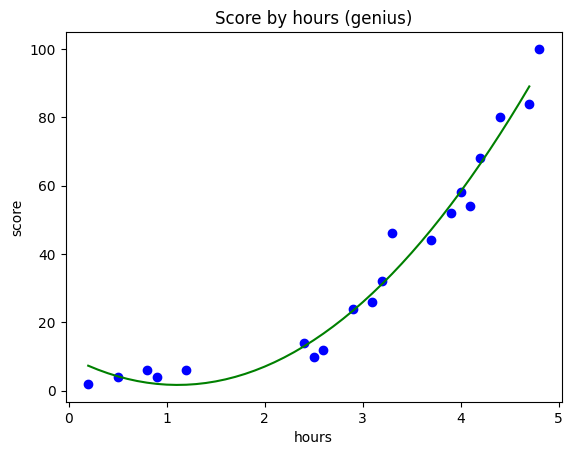

In [19]:
plt.scatter(X, y, color='blue')
plt.plot(X_range, lin_reg.predict(poly_reg.fit_transform(X_range)), color='green')
plt.title('Score by hours (genius)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show() # 선이 더 부드러운 그래프가 생성됨.
# 4차로 바꿔서 해보면 좀더 정확한 그래프가 됨.

### 공부 시간에 따른 시험 성적 예측

In [20]:
reg.predict([[2]]) # 2시간을 공부했을 때 선형 회귀 모델의 예측

array([19.85348988])

In [26]:
lin_reg.predict(poly_reg.fit_transform([[2]])) # 2시간을 공부했을 때 다항 회귀 모델의 예측. poly_reg.fit_transform 을 쓴다는 것을 유의

array([7.05092142])

In [22]:
lin_reg.score(X_poly, y) # 다항 회귀에서의 점수

0.9755457185555199

차원을 너무 높히면 과대 적합이 오므로 훈련데이터에만 너무 취중해서 훈련데이터로 확인했을 때는 점수가 굉장히 잘 나오지만 일반적인 데이터를 넣었을 때는 점수가 형편없이 나오는 과대 적합이 오거나 학습이 너무 덜 되어서 훈련데이터 조차 점수가 낮게 나오는 과소 접합을 주의해야 한다.